# Machine learning 2025 Student Exam Evaluation


Initialize imports

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Load the data and drop unnecessary columns and rows with missing values

In [155]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.drop(columns=[
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level', 
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender'
], inplace=True)  # drop unrelevant columns
df.dropna(inplace=True) # drop rows with missing values
df.head(5)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


## Data visualization of the chosen features

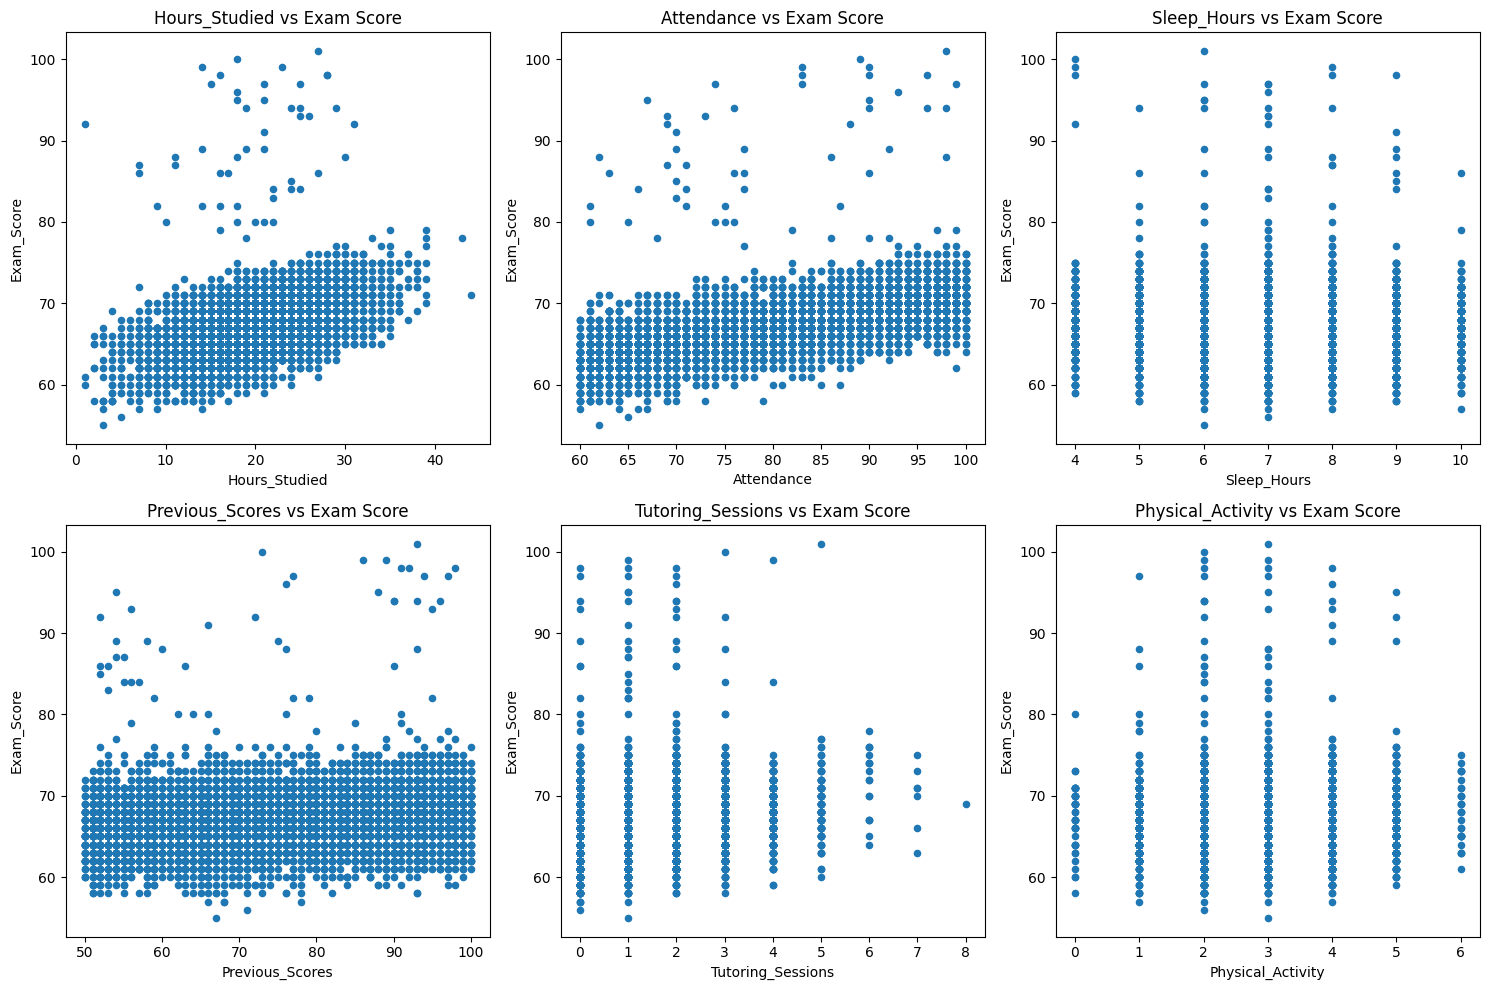

In [156]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(df.columns[:-1]):  # Exclude the target column 'Exam_Score'
    df.plot.scatter(x=feature, y='Exam_Score', ax=axes[i//3, i%3], title=f'{feature} vs Exam Score')

plt.tight_layout()
plt.show()


## Train the linear regression and Random Forest Regressor

In [157]:
# Split the data into training and testing sets with 20% for testing
X = df[df.columns[:-1]]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

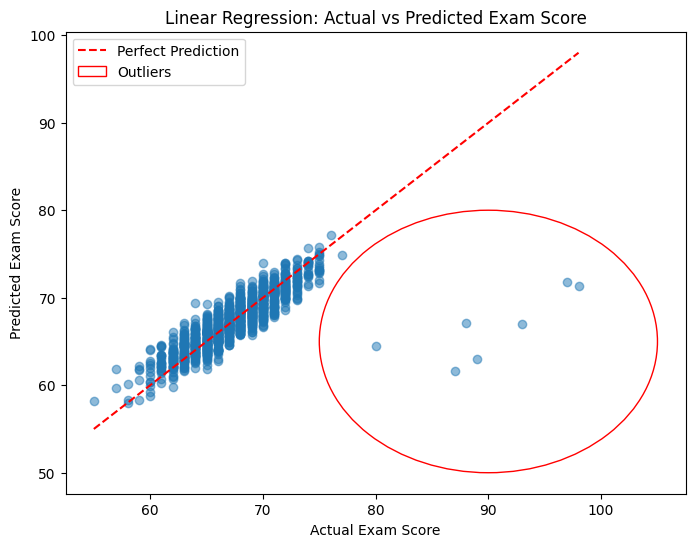

In [158]:
# Train the linear regression model and make predictions
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_y_pred = linear_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_y_pred, alpha=0.5)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Linear Regression: Actual vs Predicted Exam Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

circle = plt.Circle((90, 65), 15, color='red', fill=False, linewidth=1, label='Outliers')
plt.gca().add_patch(circle)
plt.legend()
plt.show()



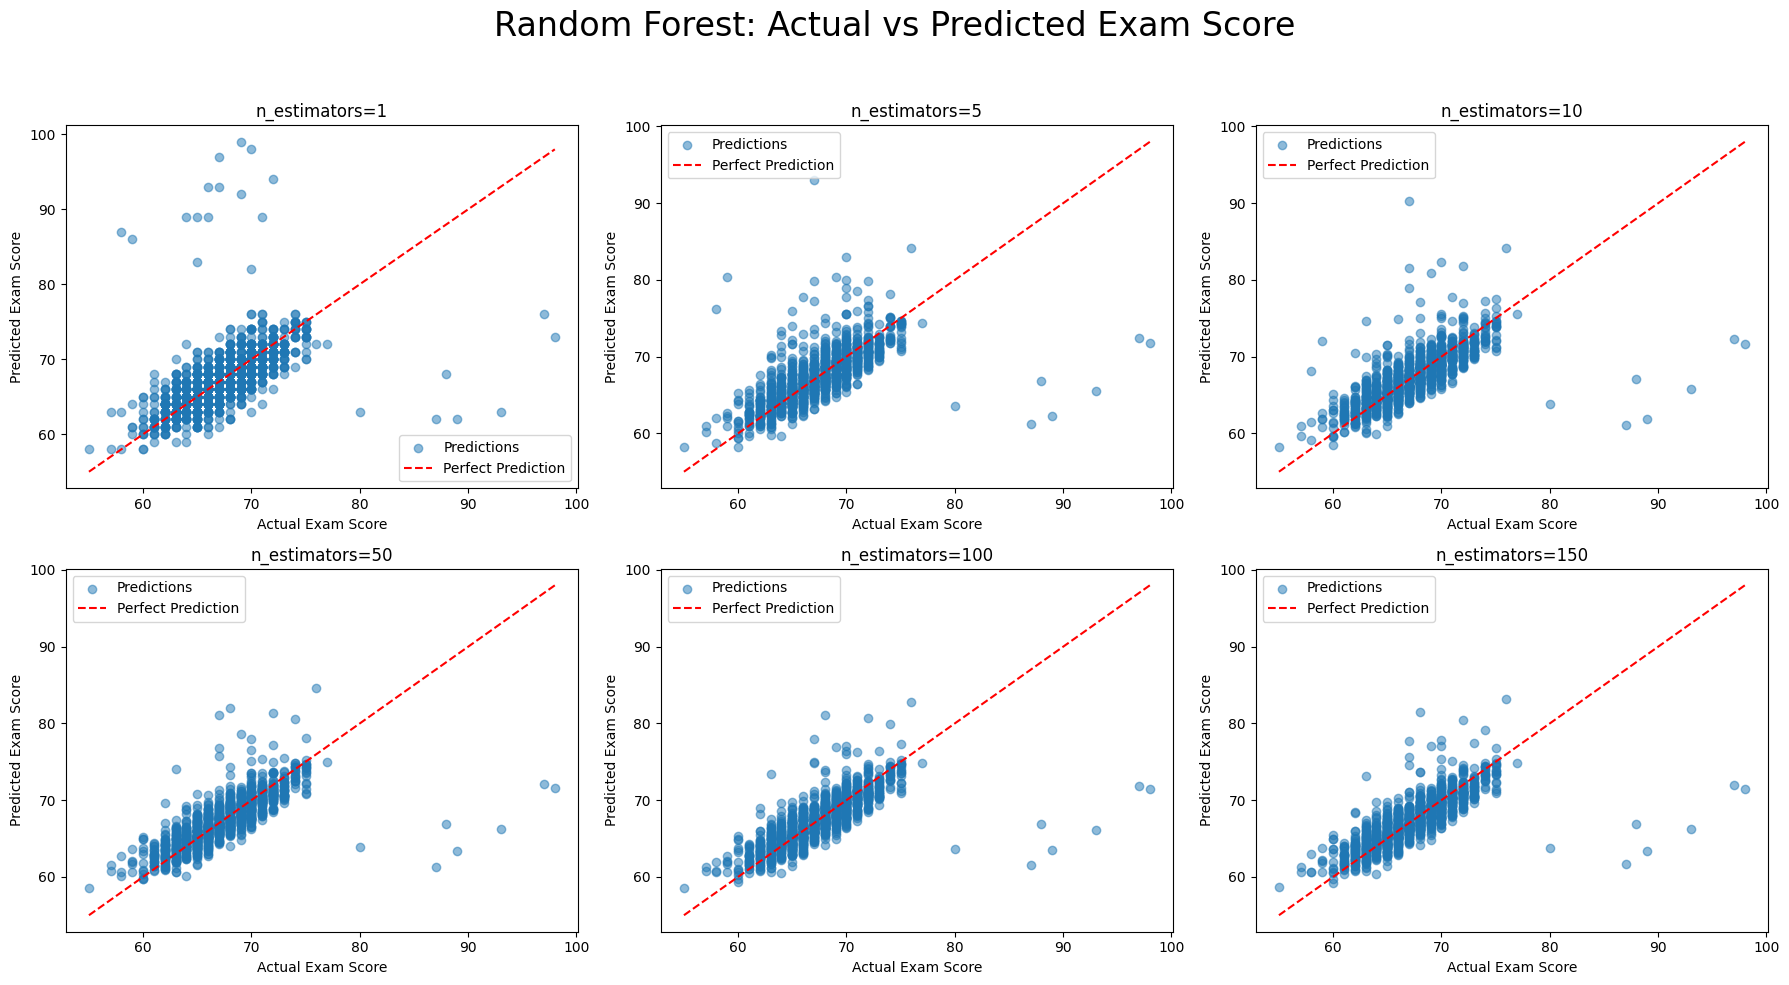

In [159]:
n_estimators_list = [1, 5, 10, 50, 100, 150]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, n in enumerate(n_estimators_list):
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    ax = axes[idx // 3, idx % 3]
    ax.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    ax.set_xlabel('Actual Exam Score')
    ax.set_ylabel('Predicted Exam Score')
    ax.set_title(f'n_estimators={n}')
    ax.legend()

fig.suptitle('Random Forest: Actual vs Predicted Exam Score', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Visual analysis of the Random Forest Regressor results indicates that increasing the number of estimators beyond 10 does not yield significant improvements in performance. A model with 10 estimators is selected as the optimal configuration for subsequent analysis.

## Calculating Error

Calculate error using root mean squared error (RMSE)



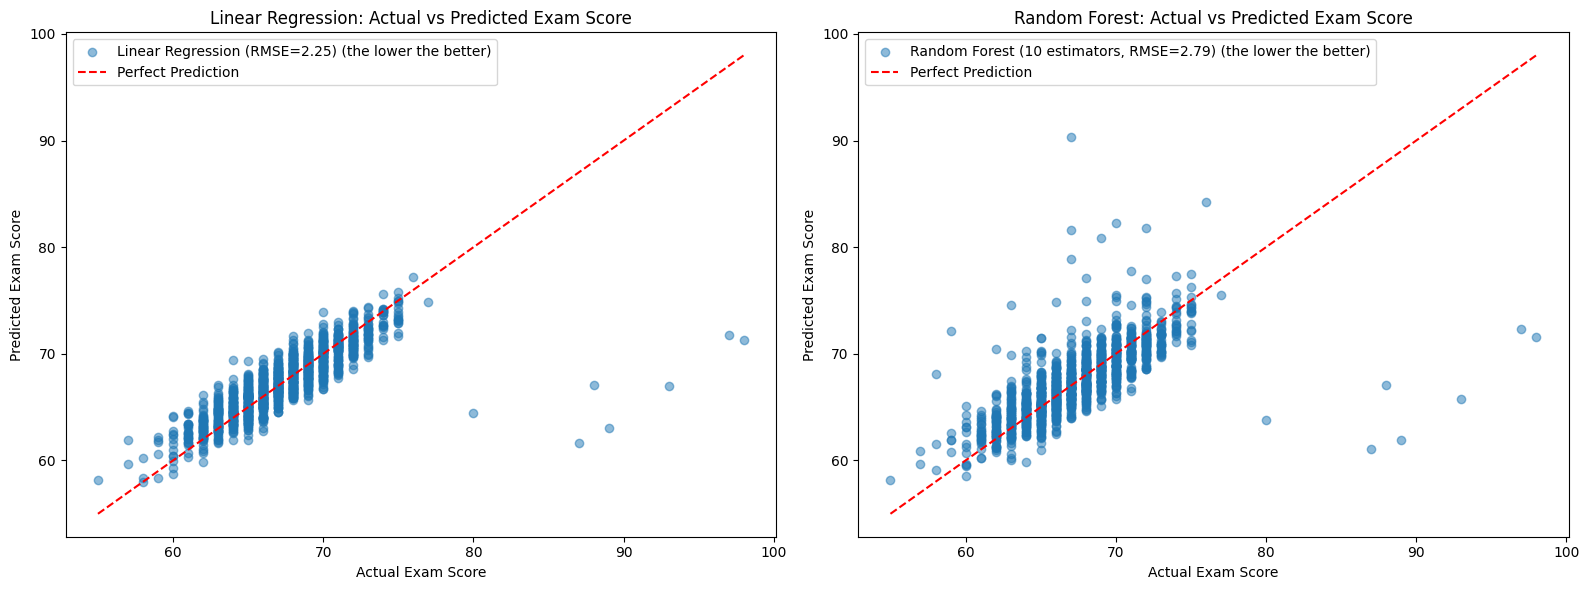

Linear Regression RMSE: 2.2507
Random Forest RMSE: 2.7889


In [160]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

linear_rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))

axes[0].scatter(y_test, linear_y_pred, alpha=0.5, label=f'Linear Regression (RMSE={linear_rmse:.2f}) (the lower the better)')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
axes[0].set_xlabel('Actual Exam Score')
axes[0].set_ylabel('Predicted Exam Score')
axes[0].set_title('Linear Regression: Actual vs Predicted Exam Score')
axes[0].legend()

axes[1].scatter(y_test, rf_y_pred, alpha=0.5, label=f'Random Forest (10 estimators, RMSE={rf_rmse:.2f}) (the lower the better)')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
axes[1].set_xlabel('Actual Exam Score')
axes[1].set_ylabel('Predicted Exam Score')
axes[1].set_title('Random Forest: Actual vs Predicted Exam Score')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"Linear Regression RMSE: {linear_rmse:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

## Conclusion
The linear regression model achieves a lower RMSE (2.3) compared to the Random Forest model (2.8), indicating that linear regression provides a better fit and more accurate predictions for the exam scores in this dataset.